# Descriptive statistics 
Dataset: Dataset of academic performance evolution for engineering students published April 18th 2020, collected by the Colombian Institute for the Evaluation of Education (ICFES) in xlsx format: **data_academic_performance.xlsx**

In [39]:
print("hello kat")

hello kat


Load packages

In [9]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import numpy as np

Plots setup

In [15]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,2.5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

Load dataset

In [10]:
df = pd.read_csv("df_sum_score.csv")

## Distributions

### Number of individuals by gender

### Number of individuals by gender & socio-economic level

Stacked bar plot

In [11]:
# Create dataframe of number of Males (M) and Females (F) by each stratum level
df_gen_soc = df.groupby(["STRATUM", "GENDER"]).size().reset_index().pivot(columns='GENDER', index='STRATUM', values=0)
df_gen_soc


GENDER,F,M
STRATUM,,
0,6,8
Stratum 1,705,1004
Stratum 2,1644,2385
Stratum 3,1682,2363
Stratum 4,640,938
Stratum 5,235,398
Stratum 6,131,272


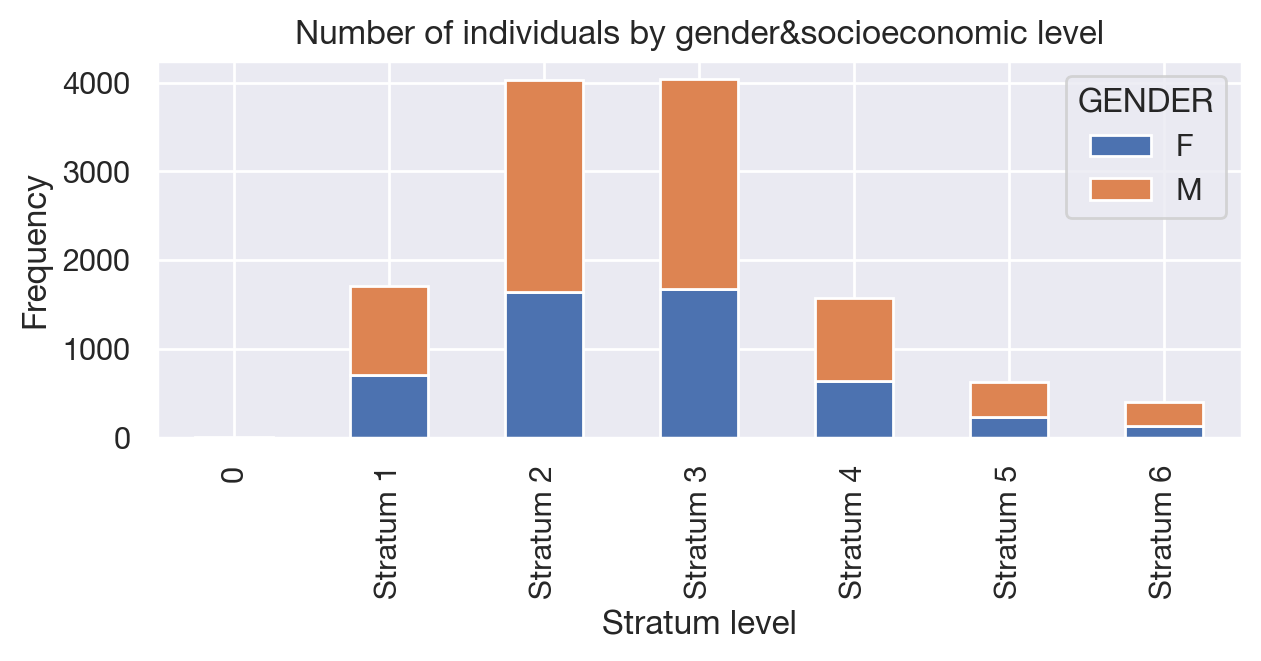

In [17]:
# Stacked bar chart of the gender/stratum dataframe above
df_gen_soc.plot(kind='bar', stacked=True)
plt.title("Number of individuals by gender&socioeconomic level")
plt.ylabel("Frequency")
plt.xlabel("Stratum level")
plt.show()

### Distribution of grades by gender & socio-economic level (before and after college)

In [27]:
# Create subset of dataframe to use for plot
df_gen_soc_hc = df[['HI_GRADE_AVG', 'COL_GRADE_AVG', 'GENDER', 'STRATUM']]

# Columns are renamed to use in plot
df_gen_soc_hc = df_gen_soc_hc.rename(columns = {"HI_GRADE_AVG":"HI", "COL_GRADE_AVG":"COL"})

In [28]:
# Create dataframe with one column of both "HI" and "COL" and another column with respective average HI or COL grade
 # There will be 2*rows of the original df as there will be a "HI" and "COL" for each candidate
df_try = pd.melt(df_gen_soc_hc, id_vars=['GENDER', 'STRATUM']) 
df_try = df_try.rename(columns={"variable":"Average_grade"}) # rename columns to use for plot

#Show dataframe used for plotting
df_try

,GENDER,STRATUM,Average_grade,value
0,F,Stratum 4,HI,74.666667
1,F,Stratum 5,HI,76.333333
2,M,Stratum 2,HI,43.000000
3,F,Stratum 2,HI,59.666667
4,M,Stratum 4,HI,77.666667
...,...,...,...,...
24817,M,Stratum 2,COL,81.333333
24818,M,Stratum 2,COL,31.333333
24819,M,Stratum 2,COL,86.333333
24820,F,Stratum 3,COL,46.333333


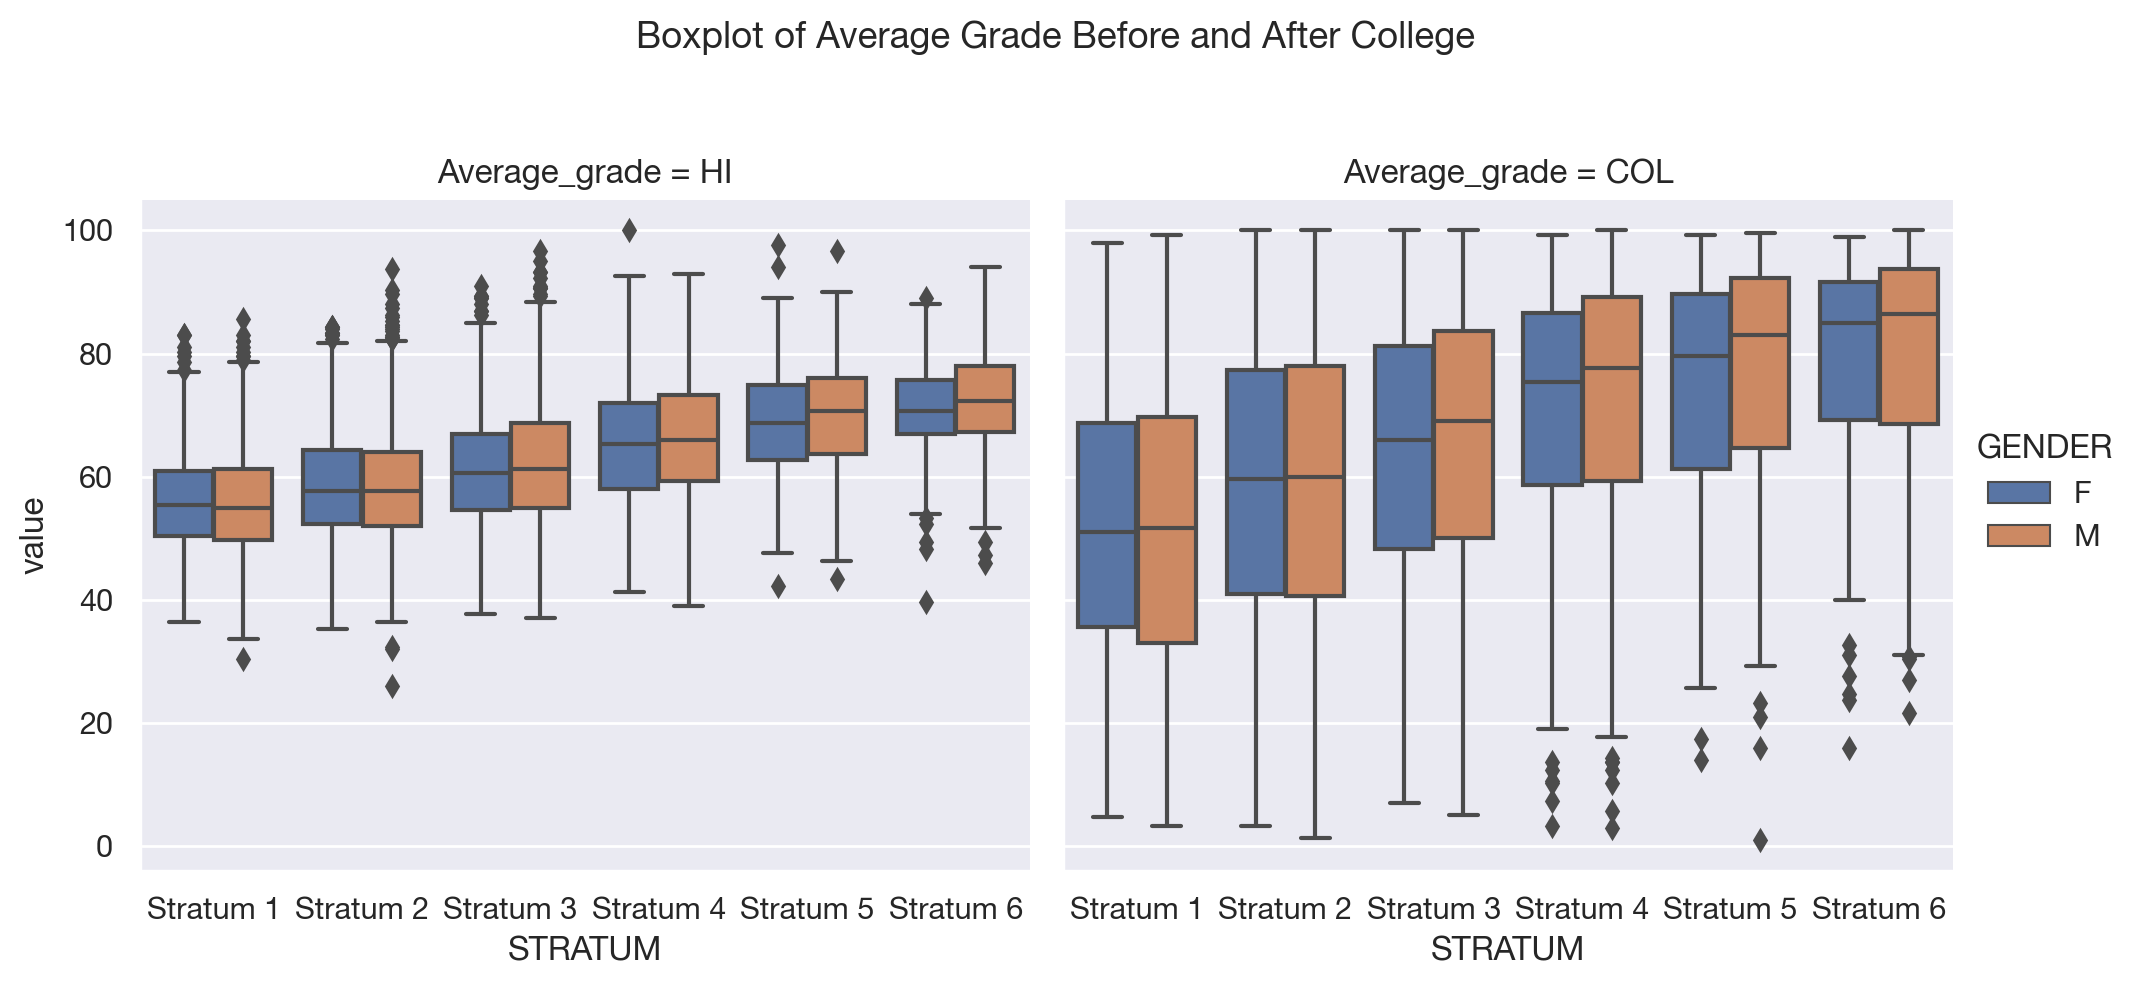

In [25]:
#Plot grouped boxplot of Males and Females, per stratum, in two figures for before college and after college.
b = sns.catplot(data=df_try, x='STRATUM', y='value', 
               hue='GENDER', col='Average_grade',
               kind='box', legend=True, order=["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Stratum 5", "Stratum 6"])
b.fig.subplots_adjust(top=.8)
b.fig.suptitle('Boxplot of Average Grade Before and After College')


plt.show()

###  Correlation matrix showing the correlation between grades before vs after college

In [37]:
# Dataframe to use for correlation of HI and COL grades
df_corr_HI_COL = df_gen_soc_hc.copy()

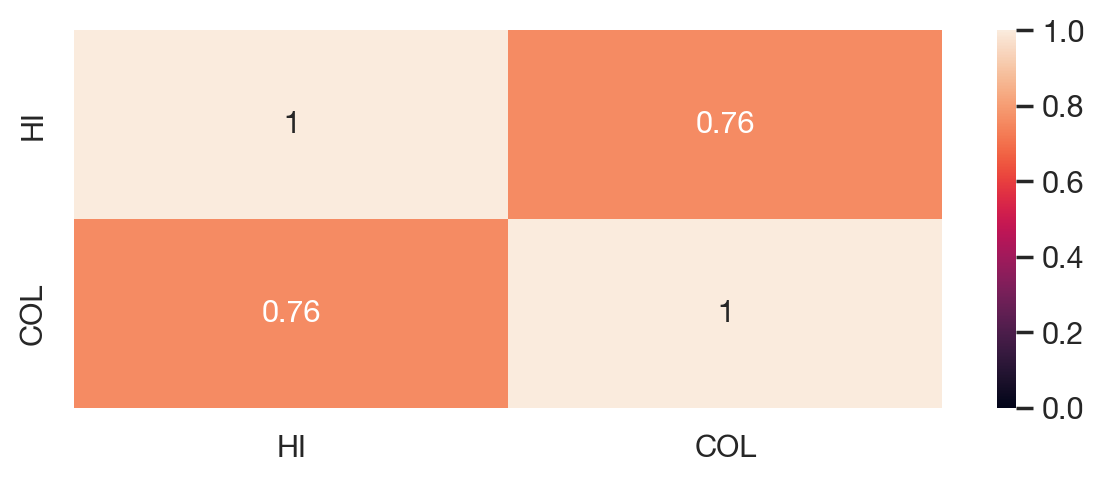

In [38]:
sns.heatmap(df_use[["HI", "COL"]].corr(method="pearson"), vmin=0.0, vmax=1.0, annot = True);

### Correlation matrix showing the (Pearson) correlation between grades (before), grades (after), gender, socio-economic level